In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!pip install transformers -q

In [3]:
from transformers import pipeline

In [4]:
emotion=pipeline('sentiment-analysis',model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [5]:
#Example

In [6]:
emotion_labels=emotion('I am excited about my new assignment')

In [7]:
emotion_labels

[{'label': 'excitement', 'score': 0.9941380023956299}]

In [8]:
emotion_labels[0]['label']

'excitement'

In [9]:
import pandas as pd

In [11]:
text_df=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/extra/emotion_detection/tweet_emotions.csv')

In [12]:
text_df.shape

(40000, 3)

In [13]:
text_df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [14]:
text_df['content']

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [15]:
#Finding emotions for top 10 rows

In [16]:
text_df['content'][1:11].apply(emotion)

1     [{'label': 'neutral', 'score': 0.9288991093635...
2       [{'label': 'joy', 'score': 0.7030636072158813}]
3       [{'label': 'joy', 'score': 0.5057858228683472}]
4     [{'label': 'desire', 'score': 0.80342680215835...
5     [{'label': 'neutral', 'score': 0.9537406563758...
6     [{'label': 'neutral', 'score': 0.3837677538394...
7     [{'label': 'approval', 'score': 0.636143803596...
8      [{'label': 'love', 'score': 0.9831995964050293}]
9     [{'label': 'remorse', 'score': 0.4822776913642...
10    [{'label': 'neutral', 'score': 0.8785988688468...
Name: content, dtype: object

In [17]:
#creating a custom function to retrieve the emotion label for all the individual rows of the dataframe

In [18]:
def get_emotion_label(text):
    return (emotion(text)[0]['label'])

In [19]:
#example

In [20]:
get_emotion_label('I am excited about todays match')

'excitement'

In [22]:
#Let's take a sample of 500 rows and find out the emotions from the text

In [23]:
sample_df=text_df.sample(n=500)

In [24]:
sample_df.head()

,tweet_id,sentiment,content
29432,1751213900,relief,Back from a long day of working it's good to f...
33095,1752504222,happiness,@WordyDirts Thanks your my first lol
29742,1751325268,love,Home from a day of pampering with mom &amp; di...
39927,1753903203,happiness,instant-messaging with two of my favourite con...
5950,1961101498,sadness,it is always sunny on days when i can't possib...


In [25]:
sample_df['emotion']=sample_df['content'].apply(get_emotion_label)

In [26]:
sample_df.head()

,tweet_id,sentiment,content,emotion
29432,1751213900,relief,Back from a long day of working it's good to f...,curiosity
33095,1752504222,happiness,@WordyDirts Thanks your my first lol,gratitude
29742,1751325268,love,Home from a day of pampering with mom &amp; di...,joy
39927,1753903203,happiness,instant-messaging with two of my favourite con...,love
5950,1961101498,sadness,it is always sunny on days when i can't possib...,neutral


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

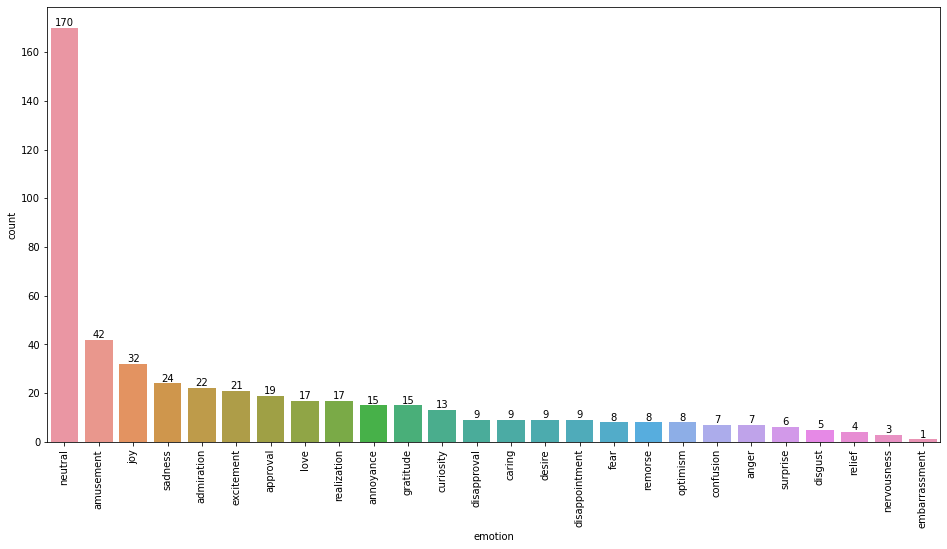

In [42]:
plt.figure(figsize=(16,8))
cp=sns.countplot(x='emotion',data=sample_df,order=sample_df['emotion'].value_counts(ascending=False).index)
cp.bar_label(cp.containers[0])
plt.xticks(rotation ='vertical')
plt.show()